In [14]:
#https://medium.com/towards-formula-1-analysis/how-i-analyze-formula-1-data-with-python-2021-italian-gp-dfb11db4b73

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

In [3]:
# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None 

In [4]:
# Load the session data
race = ff1.get_session(2021, 'Monza', 'R')

In [5]:
# Get the laps
laps = race.load_laps(with_telemetry=True)

/opt/anaconda3/lib/python3.9/site-packages/fastf1/core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Italian Grand Prix - Race [v2.2.8]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_dat

In [6]:
# Get laps of the drivers (BOT and HAM)
laps_ric = laps.pick_driver('RIC')
laps_ver = laps.pick_driver('VER')

In [7]:
# We are only analyzing stint 1, so select that one
laps_ric = laps_ric.loc[laps_ric['Stint'] == 1]
laps_ver = laps_ver.loc[laps_ver['Stint'] == 1]

In [8]:
laps_ric['RaceLapNumber'] = laps_ric['LapNumber'] - 1
laps_ver['RaceLapNumber'] = laps_ver['LapNumber'] - 1

In [9]:
full_distance_ver_ric = pd.DataFrame()
summarized_distance_ver_ric = pd.DataFrame()

In [10]:
for lap in laps_ver.iterlaps():
    telemetry = lap[1].get_car_data().add_distance().add_driver_ahead()
    
    # Only run this loop when driver ahead is RIC, otherwise we compare wrong distance gaps
    telemetry = telemetry.loc[telemetry['DriverAhead'] == "3"]
    
    if len(telemetry) != 0:
        # Full distance
        lap_telemetry = telemetry[['Distance', 'DistanceToDriverAhead']]
        lap_telemetry.loc[:, 'Lap'] = lap[0] + 1

        full_distance_ver_ric = full_distance_ver_ric.append(lap_telemetry)

        # Average / median distance
        distance_mean = np.nanmean(telemetry['DistanceToDriverAhead'])
        distance_median = np.nanmedian(telemetry['DistanceToDriverAhead'])

        summarized_distance_ver_ric = summarized_distance_ver_ric.append({
            'Lap': lap[0] + 1,
            'Mean': distance_mean,
            'Median': distance_median
        }, ignore_index = True)


/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_57730/2066595764.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_distance_ver_ric = full_distance_ver_ric.append(lap_telemetry)
/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_57730/2066595764.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summarized_distance_ver_ric = summarized_distance_ver_ric.append({
/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_57730/2066595764.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_distance_ver_ric = full_distance_ver_ric.append(lap_telemetry)
/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_57730/2066595764.py:18: FutureWarning: The frame.append method is deprecated and wil

/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_57730/2066595764.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_distance_ver_ric = full_distance_ver_ric.append(lap_telemetry)
/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_57730/2066595764.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summarized_distance_ver_ric = summarized_distance_ver_ric.append({
/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_57730/2066595764.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_distance_ver_ric = full_distance_ver_ric.append(lap_telemetry)
/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_57730/2066595764.py:18: FutureWarning: The frame.append method is deprecated and wil

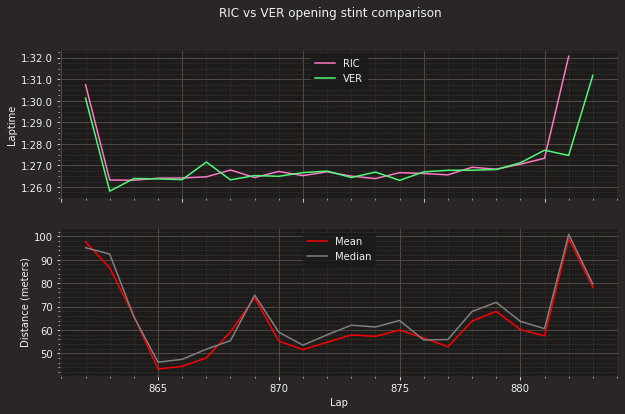

In [11]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots(2)
fig.suptitle("RIC vs VER opening stint comparison")

ax[0].plot(laps_ric['RaceLapNumber'], laps_ric['LapTime'], label='RIC')
ax[0].plot(laps_ver['RaceLapNumber'], laps_ver['LapTime'], label='VER')
ax[0].set(ylabel='Laptime', xlabel='Lap')
ax[0].legend(loc="upper center")

ax[1].plot(summarized_distance_ver_ric['Lap'], summarized_distance_ver_ric['Mean'], label='Mean', color='red')
ax[1].plot(summarized_distance_ver_ric['Lap'], summarized_distance_ver_ric['Median'], label='Median', color='grey')
ax[1].set(ylabel='Distance (meters)', xlabel='Lap')
ax[1].legend(loc="upper center")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

In [12]:
# Get lap data
lap_telemetry_ric = laps_ric.loc[laps_ric['RaceLapNumber']==4].get_car_data().add_distance()
lap_telemetry_ver = laps_ver.loc[laps_ver['RaceLapNumber']==4].get_car_data().add_distance()

distance_lap3 = full_distance_ver_ric.loc[full_distance_ver_ric['Lap']==3]
distance_lap4 = full_distance_ver_ric.loc[full_distance_ver_ric['Lap']==4]
distance_lap5 = full_distance_ver_ric.loc[full_distance_ver_ric['Lap']==5]
distance_lap6 = full_distance_ver_ric.loc[full_distance_ver_ric['Lap']==6]

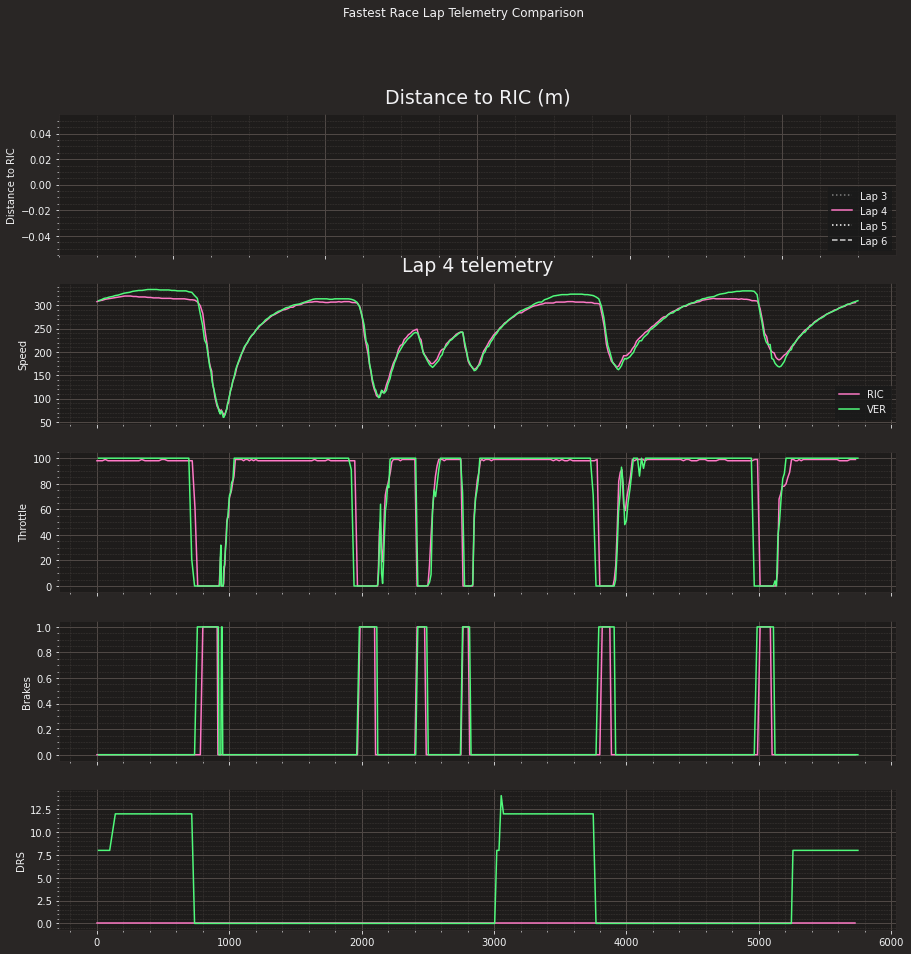

In [13]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [15, 15]

fig, ax = plt.subplots(5)
fig.suptitle("Fastest Race Lap Telemetry Comparison")

ax[0].title.set_text("Distance to RIC (m)")
ax[0].plot(distance_lap3['Distance'], distance_lap3['DistanceToDriverAhead'], label='Lap 3', linestyle='dotted', color='grey')
ax[0].plot(distance_lap4['Distance'], distance_lap4['DistanceToDriverAhead'], label='Lap 4')
ax[0].plot(distance_lap5['Distance'], distance_lap5['DistanceToDriverAhead'], label='Lap 5', linestyle='dotted', color='white')
ax[0].plot(distance_lap6['Distance'], distance_lap6['DistanceToDriverAhead'], label='Lap 6', linestyle='dashed', color='lightgrey')
ax[0].legend(loc="lower right")
ax[0].set(ylabel='Distance to RIC')

ax[1].title.set_text("Lap 4 telemetry")
ax[1].plot(lap_telemetry_ric['Distance'], lap_telemetry_ric['Speed'], label='RIC')
ax[1].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Speed'], label='VER')
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

ax[2].plot(lap_telemetry_ric['Distance'], lap_telemetry_ric['Throttle'], label='RIC')
ax[2].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Throttle'], label='VER')
ax[2].set(ylabel='Throttle')

ax[3].plot(lap_telemetry_ric['Distance'], lap_telemetry_ric['Brake'], label='RIC')
ax[3].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Brake'], label='VER')
ax[3].set(ylabel='Brakes')

ax[4].plot(lap_telemetry_ric['Distance'], lap_telemetry_ric['DRS'], label='RIC')
ax[4].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['DRS'], label='VER')
ax[4].set(ylabel='DRS')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()